## <font color=Green>GMD Figure 8 (Matlab Code) </font>  
#### <font color=blue> *Extreme sea-level return-period curves at New York City under SSP1-2.6 and SSP5-8.5, under Workflows 1f, 2f, 3f and 4, in the historical period (black) and the years 2050 (blue) and 2100 (red).* </font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr
from datetime import date
import os
#
import warnings
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
#
colrs = 'rcbgmyrkcbgm'

In [2]:
sitelab='New York';
selectedSite = 12;      #PSMSL ID for NYC
threshold = 0.5148;     #GPD threshold
scale = 0.1285;         #GPD scale
shape = 0.188;          #GPD shape
llambda = 2.8085;        #Poisson Lambda

### <font color=blue> List of **Workflows** and **Data** to be used </font>

In [3]:
# Load FACTS module names/data as a dataframe.
df = pd.read_fwf('001_input_Names_Modules_dataFILES/Fig6_IP_workflow_dataFILE_LOCAL.txt',comment = '#')
df

,Component,Workflow,DataFile
0,total,wf1f,total.workflow.wf1f.local.nc
1,total,wf2f,total.workflow.wf2f.local.nc
2,total,wf3f,total.workflow.wf3f.local.nc
3,total,wf4,total.workflow.wf4.local.nc


In [4]:
import fig_ESL as IP
#
EXPDATE = 221217; 
#
# Get the RSL form workflows.
[SAMPSLOCRISE_126, yrs] = IP.ncWF(df,['ssp126'],EXPDATE);
[SAMPSLOCRISE_585, yrs] = IP.ncWF(df,['ssp585'],EXPDATE);
#
yrs = np.insert(yrs, 0, 2010, axis=0)
#
testz = np.arange(0, 10+0.01, 0.01)
#
# Historic Curve (Black Line)
histcurve=np.exp(IP.GPDLogNExceedances(testz-threshold,llambda,shape,scale,-threshold))

In [5]:
WFNO = 4 # Number of workflows.
effcurve_ssp126_mean = IP.EFcurvWF('mean',SAMPSLOCRISE_126,WFNO,yrs,testz,threshold,llambda,shape,scale)
effcurve_ssp126_50   = IP.EFcurvWF(50,SAMPSLOCRISE_126,WFNO,yrs,testz,threshold,llambda,shape,scale)
effcurve_ssp126_17   = IP.EFcurvWF(17,SAMPSLOCRISE_126,WFNO,yrs,testz,threshold,llambda,shape,scale)
effcurve_ssp126_83   = IP.EFcurvWF(83,SAMPSLOCRISE_126,WFNO,yrs,testz,threshold,llambda,shape,scale)
#
effcurve_ssp585_mean = IP.EFcurvWF('mean',SAMPSLOCRISE_585,WFNO,yrs,testz,threshold,llambda,shape,scale)
effcurve_ssp585_50   = IP.EFcurvWF(50,SAMPSLOCRISE_585,WFNO,yrs,testz,threshold,llambda,shape,scale)
effcurve_ssp585_17   = IP.EFcurvWF(17,SAMPSLOCRISE_585,WFNO,yrs,testz,threshold,llambda,shape,scale)
effcurve_ssp585_83   = IP.EFcurvWF(83,SAMPSLOCRISE_585,WFNO,yrs,testz,threshold,llambda,shape,scale)

# <font color=green> **PLOT** </font>

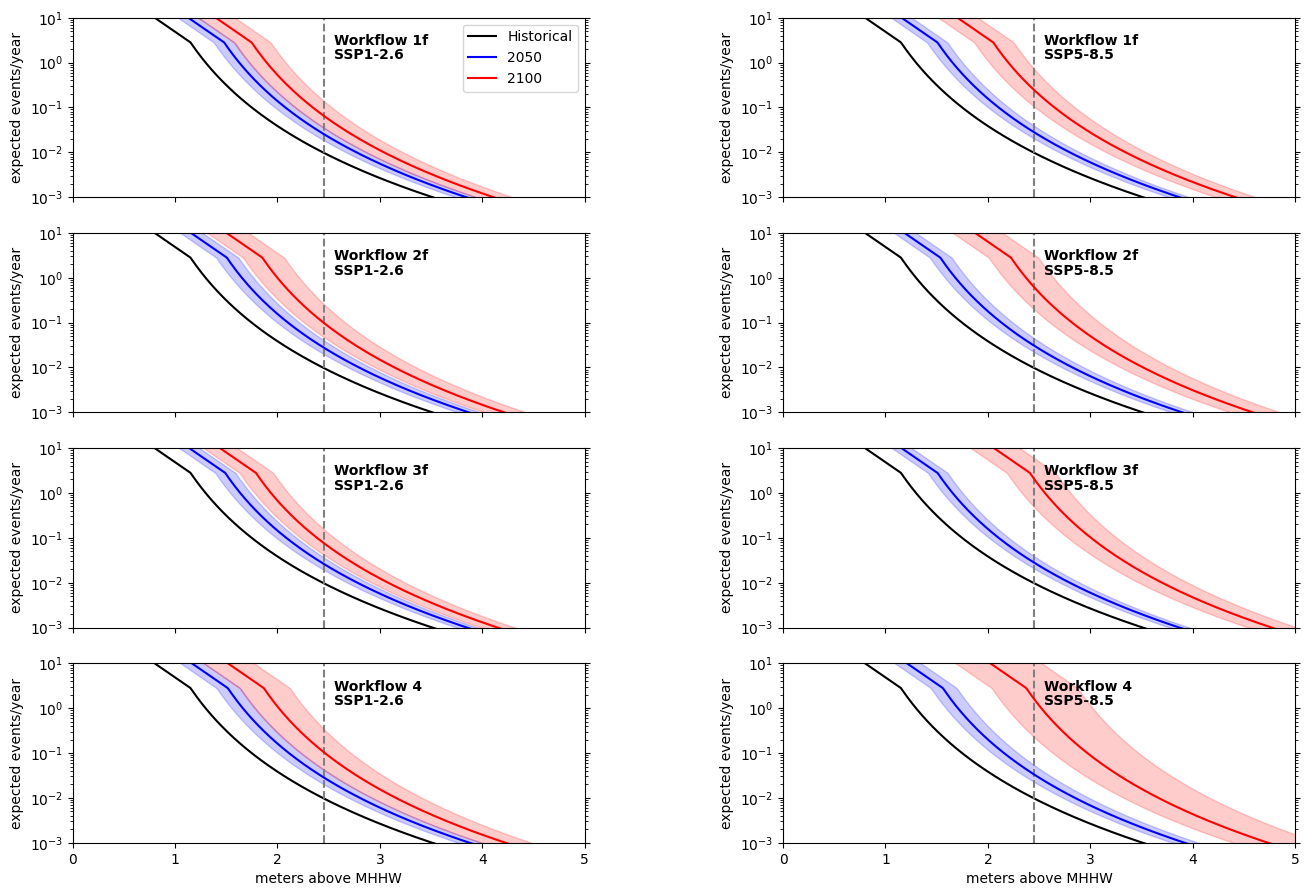

In [6]:
MEASURE='median';     # 'mean','median'
#
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(45,30), 'figure.dpi':100})
# Initialize the grid
grid    = plt.GridSpec(4, 5, wspace=0.1, hspace=-.4)
grid00  = grid[0].subgridspec(4, 5)
grid01  = grid[1].subgridspec(4, 5)
#
XAX1    = testz
SSP     = ['ssp126','ssp585']
WORKFLO = ["wf1f","wf2f","wf3f","wf4"]
#
xlim  = [0,5];  ylim  = [1e-3, 10]
#
# Subplot Axis.
ax1_wf1f = plt.subplot(grid00[0, :4]);   ax2_wf1f = plt.subplot(grid01[0, :4]);
ax1_wf2f = plt.subplot(grid00[1, :4]);   ax2_wf2f = plt.subplot(grid01[1, :4]);
ax1_wf3f = plt.subplot(grid00[2, :4]);   ax2_wf3f = plt.subplot(grid01[2, :4]);
ax1_wf4  = plt.subplot(grid00[3, :4]);   ax2_wf4  = plt.subplot(grid01[3, :4]); 
#
#
# Loop through each SSP
for ss in SSP: 
    for wf in enumerate(WORKFLO):
        #
        # Select subplot axis based on workflow
        if ss == 'ssp126': 
            ax1 = eval(f'ax1_{wf[1]}');  
            effcurve   = eval(f'effcurve_{ss}_mean')
            effcurve50 = eval(f'effcurve_{ss}_50')
            effcurve17 = eval(f'effcurve_{ss}_17')
            effcurve83 = eval(f'effcurve_{ss}_83')
            #
        elif ss == 'ssp585':
            ax1 = eval(f'ax2_{wf[1]}');  
            effcurve   = eval(f'effcurve_{ss}_mean')
            effcurve50 = eval(f'effcurve_{ss}_50')
            effcurve17 = eval(f'effcurve_{ss}_17')
            effcurve83 = eval(f'effcurve_{ss}_83')
        #
        # Historic.
        ax1.plot(XAX1, histcurve, '-k',label = 'Historical')
        #
        # Grey Line
        x = testz;  y = histcurve;  
        tolerance = 0.01    # Set a tolerance for the y-values (e.g., 0.1)
        # Find the x-values corresponding to y-values that are within the tolerance
        x_intercepts = x[np.abs(y) < tolerance]
        # x_intercepts[0]
        ax1.axvline(x=x_intercepts[0],color=(0.5, 0.5, 0.5),linestyle='--')
        #
        # Plot 2050
        if MEASURE == 'median':
            ax1.plot(XAX1, effcurve50[4,:,wf[0]], '-b',label = '2050')
            # ax1.plot(XAX1, effcurve17[4,:,wf[0]], '--b')
            # ax1.plot(XAX1, effcurve83[4,:,wf[0]], '--b')
            ax1.fill_between(XAX1, effcurve17[4,:,wf[0]], effcurve83[4,:,wf[0]],color='blue', alpha=0.2)
        elif MEASURE == 'mean':
            ax1.plot(XAX1, effcurve[4,:,wf[0]], '-b',label = 'N_e (2050)')
        #
        #
        # Plot 2100
        if MEASURE == 'median':    
            ax1.plot(XAX1, effcurve50[9,:,wf[0]], '-r',label = '2100')
            # ax1.plot(XAX1, effcurve17[9,:,wf[0]], '--r')
            # ax1.plot(XAX1, effcurve83[9,:,wf[0]], '--r')
            ax1.fill_between(XAX1, effcurve17[9,:,wf[0]], effcurve83[9,:,wf[0]],color='red', alpha=0.2)
        elif MEASURE == 'mean':
            ax1.plot(XAX1, effcurve[9,:,wf[0]], '-r',label = 'N_e (2100)')
        #
        #
        ax1.set_yscale("log")
        #
        ax1.tick_params(axis='both', labelsize=10)
        ax1.yaxis.set_ticks_position('both')
        # ax1.legend(loc='upper right',prop={'size': 10}); 
        ax1.set_xlim(xlim); ax1.set_ylim(ylim)
        #
        ax1.set_xlabel("meters above MHHW");
        ax1.set_ylabel("expected events/year");
        # WorkFlow Title.
        ax1.text(.51, .91, 'Workflow '+wf[1][2:], horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax1.transAxes)
        ax1.text(.51, .83, ss[:3].upper()+ss[3]+'-'+ss[4]+'.'+ss[5], horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax1.transAxes)
        #
        if wf[1] != 'wf4': ax1.xaxis.set_ticklabels([]); ax1.set_xlabel('')
        if wf[1] == 'wf1f' and ss == 'ssp126': ax1.legend(loc='upper right',prop={'size': 10});
        # plt.title('NEW YORK') 

# Get todays date.
today = date.today().strftime('%Y-%m-%d')
# Save Figure.
figureNAME = "Fig8_ESL"+today+".pdf"
if os.path.exists(figureNAME): os.remove(figureNAME)
# plt.savefig(figureNAME, format="pdf", bbox_inches="tight")
# 
plt.show()        